### Introduction

Le jeu de données contient des transactions effectuées par carte de crédit en septembre 2013 par des titulaires de cartes européens. Il présente des transactions sur une période de deux jours, avec un total de 492 fraudes parmi 284 807 transactions. Ce jeu de données est fortement déséquilibré, la classe positive (fraudes) ne représentant que 0,172 % de l'ensemble des transactions.

Les variables d'entrée sont exclusivement numériques et résultent d'une transformation par analyse en composantes principales (ACP). En raison de problèmes de confidentialité, les caractéristiques d'origine ne sont pas fournies, et peu d'informations contextuelles sont disponibles.

Les caractéristiques V1 à V28 correspondent aux composantes principales obtenues par ACP. Les seules variables qui n'ont pas été transformées par ACP sont Time et Amount. La variable Time représente le nombre de secondes écoulées entre chaque transaction et la première transaction du jeu de données. La variable Amount indique le montant de la transaction et peut être utilisée, par exemple, pour un apprentissage sensible au coût en fonction des exemples.

La variable Class est la variable réponse, prenant la valeur 1 en cas de fraude et 0 sinon.

In [2]:
import pandas as pd

# Chargement du dataset
data = pd.read_csv('../../data/creditcard.csv')

# Aperçu des premières lignes
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

On observe bien que le DataFrame contient **284,807 entrées**, numérotées de **0 à 284,806**. Chaque ligne de ce DataFrame représente une transaction distincte.

On remarque également qu'il y a un total de **31 colonnes** dans ce DataFrame. En vérifiant les données, on peut voir que chaque colonne présente **284,807 valeurs non nulles**, ce qui indique qu'il n'y a aucune valeur manquante. C'est un aspect crucial pour garantir l'intégrité de notre analyse, car les valeurs manquantes pourraient compromettre nos résultats.

En analysant les types de données, on observe que **30 colonnes** contiennent des nombres à virgule flottante (`float64`), tandis qu'une seule colonne, appelée **`Class`**, est de type entier (`int64`). Cette colonne `Class` est particulièrement importante, car elle nous indique si une transaction est frauduleuse (avec une valeur de **1**) ou non (valeur de **0**).

On peut donc conclure que la structure de ce jeu de données est bien adaptée pour développer des modèles de détection de fraude, car les variables sont clairement définies et prêtes à être analysées. Ce constat constitue un bon point de départ pour notre projet.


In [5]:
data[['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [6]:
data['Class'].value_counts(normalize=True) * 100


Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

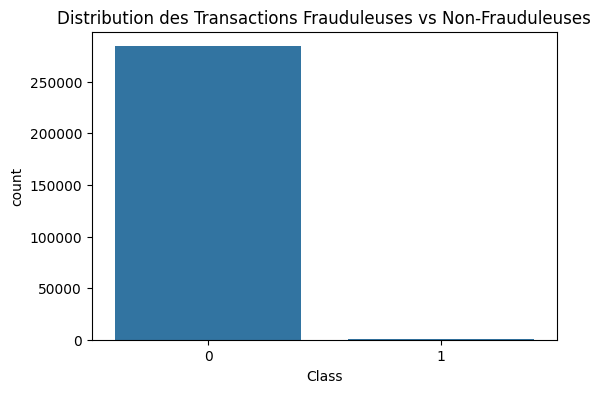

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title("Distribution des Transactions Frauduleuses vs Non-Frauduleuses")
plt.show()
